In [9]:
# Dependencies

# TODO: Put all dependencies here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import os
print(os.getcwd())
print(os.listdir())




/content
['.config', 'NBA_players_clean 2.csv', 'sample_data']


In [10]:
file_path = 'NBA_players_clean 2.csv'
nba_data = pd.read_csv(file_path)

In [11]:
from statsmodels.api import OLS
import statsmodels.api as sm
import numpy as np

# Columns to be removed
columns_to_remove = ['Player', 'From', 'To', 'Pos', 'Ht', 'NBA 75 Team', 'ABA All-Time Team', 'All ABA', 'PTS', 'G', 'Finals MVP',
                    'Scoring Champ', 'All Rookie', 'DPOY', 'Sixth Man', 'STL Champ', 'AS MVP', 'CF MVP', 'AST Champ', 'All Star']

# Remove the specified columns
nba_data_cleaned = nba_data.drop(columns=columns_to_remove)

# Check for any missing values
missing_values = nba_data_cleaned.isnull().sum()

# Prepare the data for regression
# The target variable is 'Years'
target = 'Years'
X = nba_data_cleaned.drop(columns=[target])
y = nba_data_cleaned[target]

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = OLS(y, X).fit()

# Model summary
model_summary = model.summary()

model_summary, missing_values[nba_data_cleaned.columns[missing_values > 0]]


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  Years   R-squared:                       0.708
 Model:                            OLS   Adj. R-squared:                  0.707
 Method:                 Least Squares   F-statistic:                     675.0
 Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
 Time:                        04:19:32   Log-Likelihood:                -11598.
 No. Observations:                5023   AIC:                         2.323e+04
 Df Residuals:                    5004   BIC:                         2.336e+04
 Df Model:                          18                                         
 Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------------------------

In [12]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming X is your feature matrix with all the independent variables
# Make sure to exclude the target variable and add a constant for the intercept

# Function to calculate VIF for each feature
def calculate_vif(X):
    # Create a DataFrame for VIFs with two columns: Variable and VIF
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    # Calculate VIF for each variable
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF using the above function
vif_df = calculate_vif(X)

# Print the VIF values for each variable
print(vif_df)


         Variable          VIF
0           const  1190.897530
1          Height     3.685892
2              Wt     3.059874
3             TRB     2.285191
4             AST     2.232033
5             FG%     3.428640
6            FG3%     1.284295
7             FT%     1.193846
8            eFG%     3.200307
9             PER     2.320426
10             WS     3.641511
11        All NBA     2.689161
12  All Defensive     1.543538
13      BLK Champ     1.142140
14      TRB Champ     1.267691
15  Most Improved     1.029374
16            ROY     1.234067
17            MVP     1.761623
18  Championships     1.322424


In [13]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Standardizing the data is generally a good practice when using regularization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Ridge and Lasso with default parameters
ridge = Ridge()
lasso = Lasso()

# Perform cross-validation to evaluate the models
# For Ridge
ridge_scores = cross_val_score(ridge, X_scaled, y, cv=5)
# For Lasso
lasso_scores = cross_val_score(lasso, X_scaled, y, cv=5)

# Fit the models to the entire dataset
ridge.fit(X_scaled, y)
lasso.fit(X_scaled, y)

# Retrieve the coefficients
ridge_coefs = ridge.coef_
lasso_coefs = lasso.coef_

ridge_scores_mean = ridge_scores.mean()
lasso_scores_mean = lasso_scores.mean()

ridge_coefs, lasso_coefs, ridge_scores_mean, lasso_scores_mean


(array([ 0.        ,  0.28622301,  0.16078899,  0.10535628,  0.65030141,
         0.53843796,  0.11966018,  0.21017257, -0.12657605, -0.19544291,
         3.88950696, -1.1616159 , -0.20592817,  0.1031273 , -0.1337431 ,
         0.12055418, -0.21367467, -0.35879891,  0.3795333 ]),
 array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.49330686, -0.        ,  0.        ,  0.        , -0.        ,
         0.        , -0.        , -0.        ,  0.        ]),
 0.7039535446785563,
 0.550101880245317)

In [14]:
#Cross validation mean R-squared .703 Ridge-Regression

#Cross validation mean R-squared .550 Lasso-Regression

In [15]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
# We'll use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Displaying the sizes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4018, 19), (1005, 19), (4018,), (1005,))

In [16]:
# Re-initialize Ridge and Lasso with default parameters
ridge = Ridge()
lasso = Lasso()

# Train the models on the training data
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Evaluate the models on the testing data
ridge_score_test = ridge.score(X_test, y_test)
lasso_score_test = lasso.score(X_test, y_test)

ridge_score_test, lasso_score_test


(0.7122320449033357, 0.553344650977054)

In [17]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
# We'll use 80% of the data for training and 20% for testing
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the sizes of the train and test sets
X_train_lin.shape, X_test_lin.shape, y_train_lin.shape, y_test_lin.shape


((4018, 19), (1005, 19), (4018,), (1005,))

In [18]:
from sklearn.linear_model import LinearRegression

# Initialize and train a Linear Regression model on the training data
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate the model on the testing data
linear_score_test = linear_model.score(X_test, y_test)

linear_score_test


0.7122493222095841

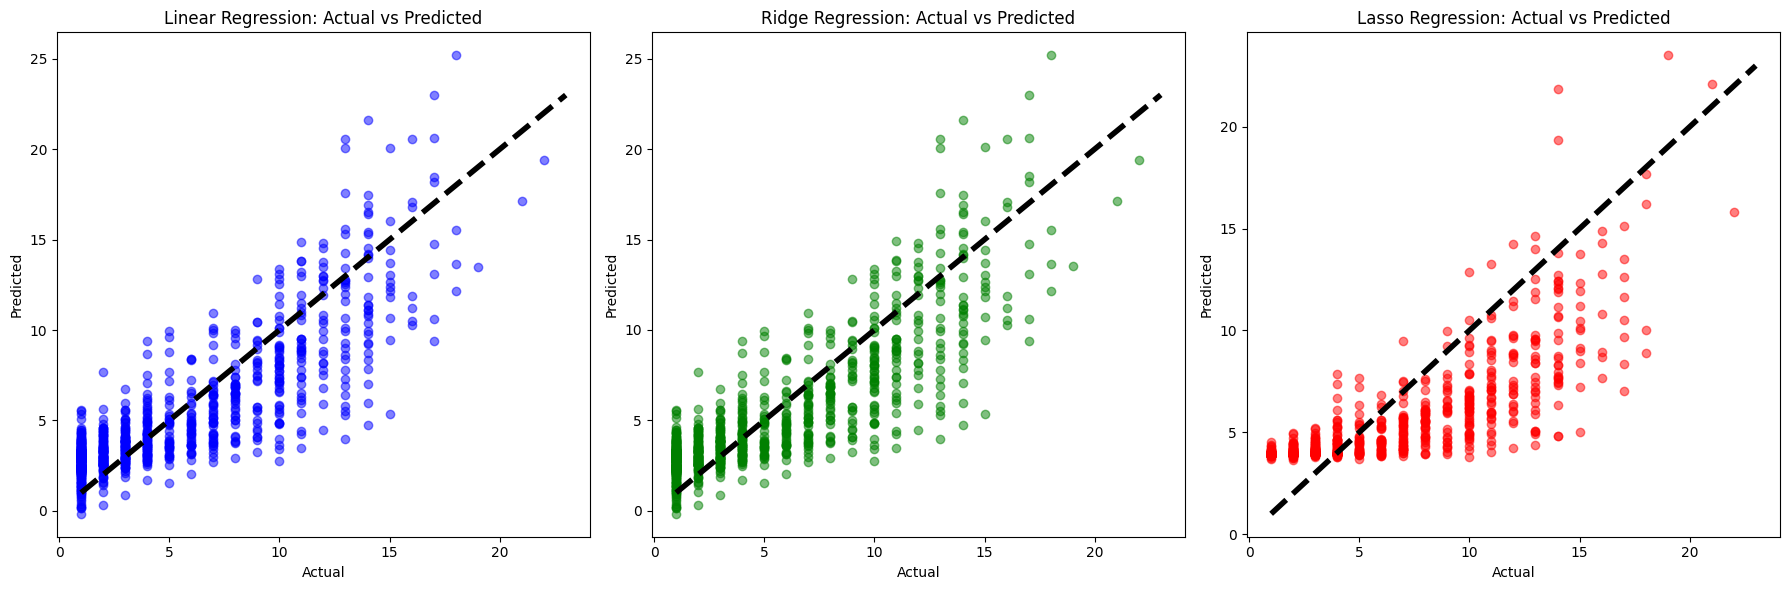

In [19]:
# To plot the actual vs predicted results for the models, we need to generate predictions for the test set
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Plot for Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot for Ridge Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot for Lasso Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Show the plot
plt.tight_layout()
plt.show()


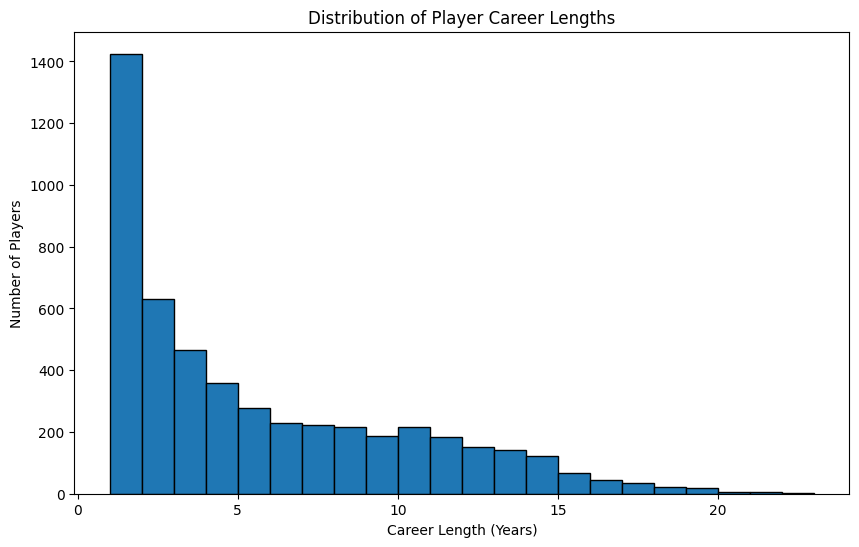

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(nba_data['Years'], bins=range(int(nba_data['Years'].min()), int(nba_data['Years'].max()) + 1), edgecolor='black')
plt.title('Distribution of Player Career Lengths')
plt.xlabel('Career Length (Years)')
plt.ylabel('Number of Players')
plt.show()


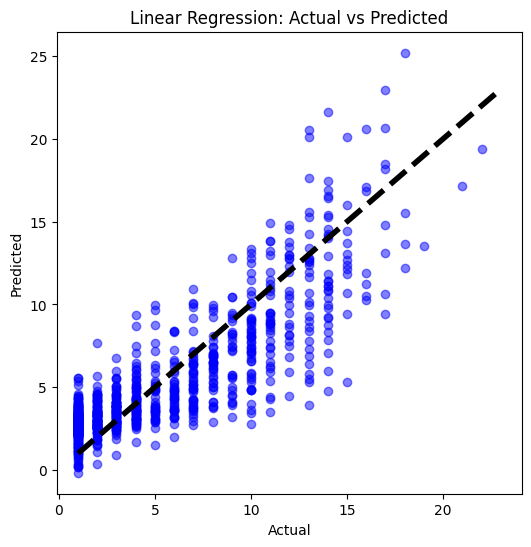

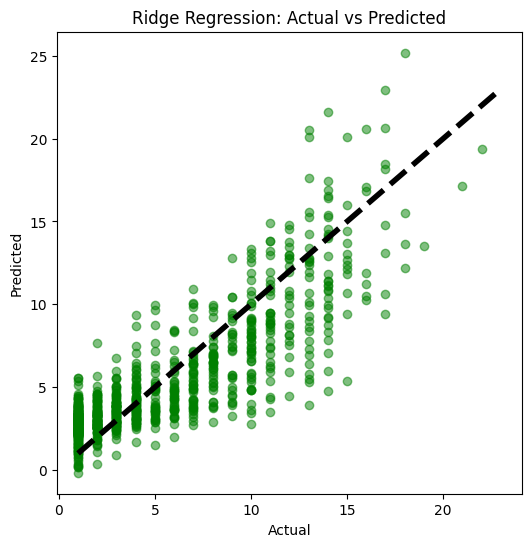

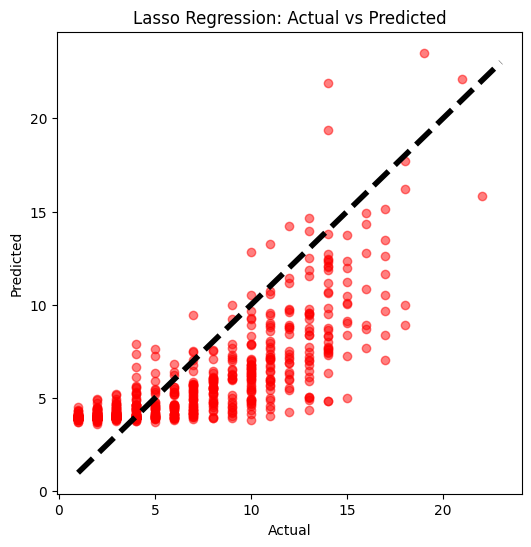

In [21]:
# Creating separate plots for each regression model's actual vs predicted results

# Linear Regression
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Ridge Regression
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Lasso Regression
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [22]:
import seaborn as sns


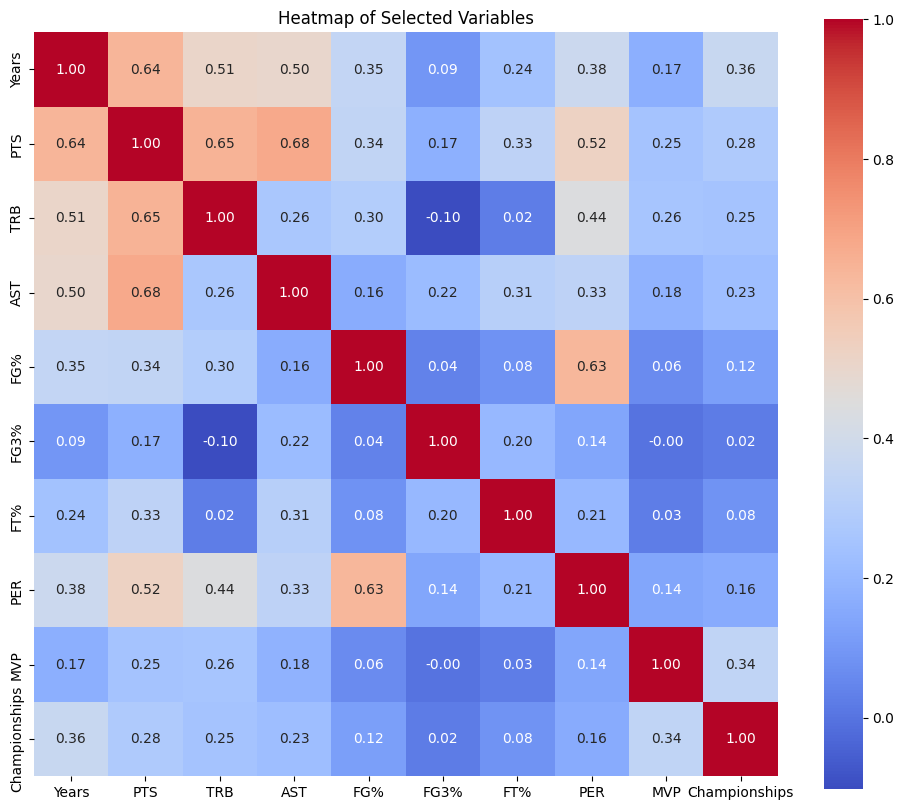

In [23]:
# Selecting a subset of variables that could be pertinent to predicting player career lengths
selected_columns = ['Years', 'PTS', 'TRB', 'AST', 'FG%', 'FG3%', 'FT%', 'PER','MVP', 'Championships']

# Creating a dataframe with only the selected columns
selected_data = nba_data[selected_columns]

# Calculating the correlation matrix
corr = selected_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap of Selected Variables')
plt.show()


In [24]:
From the heatmap, we can observe the relationships between 'Years' and other performance metrics like points per game ('PTS'), total rebounds ('TRB'), assists ('AST'), various shooting percentages ('FG%', 'FG3%', 'FT%', 'eFG%'), player efficiency rating ('PER'), win shares ('WS'), and accolades such as 'All Star', 'All NBA', 'MVP', and 'Championships'.

This visualization helps identify which variables have the strongest relationships with career length and may be most useful for modeling and prediction purposes

SyntaxError: ignored

In [ ]:
# Grouping the data by 'Pos' (Position) and calculating the average career length for each group
avg_career_length_by_pos = nba_data.groupby('Pos')['Years'].mean().sort_values()


# Creating a bar chart with each position having a different color
plt.figure(figsize=(12, 8))
colors = sns.color_palette('hsv', len(avg_career_length_by_pos))
avg_career_length_by_pos.plot(kind='bar', color=colors)
plt.title('Average Career Length by Position')
plt.xlabel('Position')
plt.ylabel('Average Career Length (Years)')
plt.xticks(rotation=45)
plt.show()